<a href="https://colab.research.google.com/github/sonhj110/Coding-Test/blob/main/%EB%84%88%EB%B9%84_%EC%9A%B0%EC%84%A0_%ED%83%90%EC%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 너비 우선 탐색(BFS, Breadth-Fisrt Search)

* 그래프 완전 탐색하는 방법 중 하나
* 시작 노드를 기준으로 가까운 노드를 먼저 방문하면서 탐색
* 선입선출 원리로 탐색(큐로 구현)
* 시간복잡도 : O(V+E) V:노드 수, E:에지 수
* https://wooono.tistory.com/411
* 활용 예: 특정 도시에서 다른 도시로 갈 수 있는지 없는지, 전자 회로에서 특정 단자와 단자가 서로 연결되어 있는지 등

* 그래프란? <br/>
정점(node)과 그 정점을 연결하는 간선(edge)으로 이루어진 자료구조를 의미합니다. <br/>
* 그래프 탐색이란? <br/>
하나의 정점으로부터 시작하여, 차례대로 모든 정점들을 한 번씩 방문하는 것을 의미합니다.
* 그래프는 인접 리스트로 표현하는 방법과 2차원 배열로 표현하는 방법이 있다

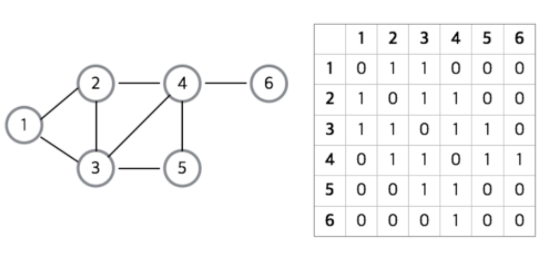
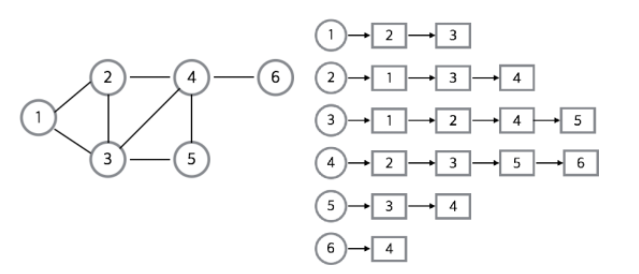

## BFS 구현하기(그래프가 인접 리스트로 표현된 경우)
1. 시작 노드를 큐에 저장하고 방문처리한다.
2. 큐에서 노드를 꺼내 인접한 노드를 탐색하여 큐에 넣고 방문처리한다. 이때 이미 방문한 노드는 큐에 넣지 않는다.
3. 큐에 값이 없어질 때까지 반복한다

In [ ]:
from collections import deque

def bfs(graph, start) : # 인자로 탐색할 그래프와 시작점을 받는다

  # 방문여부 저장할 리스트 만들기
  visited = [False] * len(graph) # 초기값은 False, 길이는 그래프의 노드 개수만큼

  # 시작 노드 큐에 저장
  queue = deque([start])

  # 시작 노드 방문처리
  visited[start] = True

  # 큐가 빌 때까지 반복
  while queue:

    # 큐에서 하나의 원소를 뽑기
    v = queue.popleft()
    print()
    print('꺼낸 원소', v)
    print(queue)

    # 탐색 순서 출력
    # print(v, end = " ")

    # 인접한 원소 중 작은 숫자부터 방문하기 위해 오름차순으로 정렬
    graph[v].sort()
    print('인접한 노드', graph[v])

    # 해당 원소에 인접한 노드 구하기
    for i in graph[v]:

      # 인접한 노드가 방문한적 없는 노드일때 큐에 추가하고 방문처리하기
      if not visited[i]:
          queue.append(i)
          visited[i] = True
          print('추가한 원소', i)
          print(queue)
          print(visited)


In [ ]:
graph = [
    [], # 노드 번호랑 인덱스 일치시키기 위해 0번 인덱스에 빈값 삽입
    [2 ,3],
    [3, 1, 4],
    [5, 2, 4, 1],
    [2, 6, 5, 3],
    [3, 4],
    [4]
]

bfs(graph, 1) # 인자로는 탐색할 그래프와 시작점을 받는다


꺼낸 원소 1
deque([])
인접한 노드 [2, 3]
추가한 원소 2
deque([2])
[False, True, True, False, False, False, False]
추가한 원소 3
deque([2, 3])
[False, True, True, True, False, False, False]

꺼낸 원소 2
deque([3])
인접한 노드 [1, 3, 4]
추가한 원소 4
deque([3, 4])
[False, True, True, True, True, False, False]

꺼낸 원소 3
deque([4])
인접한 노드 [1, 2, 4, 5]
추가한 원소 5
deque([4, 5])
[False, True, True, True, True, True, False]

꺼낸 원소 4
deque([5])
인접한 노드 [2, 3, 5, 6]
추가한 원소 6
deque([5, 6])
[False, True, True, True, True, True, True]

꺼낸 원소 5
deque([6])
인접한 노드 [3, 4]

꺼낸 원소 6
deque([])
인접한 노드 [4]


# 문제 027 미로 탐색하기(백준 2178번)
https://www.acmicpc.net/problem/2178

In [ ]:
from collections import deque

# n이 행, m이 열
n, m = input().split()
n, m = int(n), int(m)

# 상하좌우를 탐색하기 위한 리스트 선언
dx = [0, 1, 0, -1]
dy = [1, 0, -1, 0]
# 현재 노드가 (x,y)일때
# 우 : (x, y+1)
# 하 : (x. y-1)
# 좌 : (x-1, y)
# 상 : (x+1, y)

# 데이터 저장 2차원 행렬
array = []

for i in range(n) :
  # list(input()) -> ['1', '1', '0']
  array.append(list(map(int, list(input()))))

# 방문여부 저장할 리스트 만들기(마찬가지로 2차원 행렬)
visited = [[False]*m for i in range(n)]

# BFS 구현하기
def bfs(i, j) : # 인자는 시작점의 좌표
  queue = deque()
  queue.append((i, j)) # 큐에 삽입
  visited[i][j] = True # 방문처리

  while queue :
    now = queue.popleft() # 탐색할 노드 큐에서 꺼내기

    # 상하좌우 탐색
    for k in range(4) :
      x = now[0] + dx[k]
      y = now[1] + dy[k]

      if x >= 0 and y >= 0 and x < n and y < m : # 좌표 유효성 검사

        if array[x][y] != 0 and not visited[x][y] :  # 미로의 칸이 1이고, 방문 여부가 False일 때
          visited[x][y] = True                       # 방문처리 해주고
          array[x][y] = array[now[0]][now[1]] + 1    # array에 인접한 노드의 깊이를 현재 노드의 깊이+1로 업데이트
          queue.append((x,y))

bfs(0,0)
print(array[n-1][m-1])

4 6
110110
110110
111111
111101
9
